###### The Situation

* Cam has told me about your work. We have a new client who has a modelling project they need with you.
* The client work in the real estate business,and want to understand the key factors affecting rental price in his region.
* Also,you will make useful predictions for the price range in the same city.
* you will find more information in the dataset later.

###### Dataset Glossary (Column-Wise)
* BHK: Number of Bedrooms, Hall, Kitchen.
* Rent: Rent of the Houses/Apartments/Flats.
* Size: Size of the Houses/Apartments/Flats in Square Feet.
* Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)
* Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.
* Area Locality: Locality of the Houses/Apartments/Flats.
* City: City where the Houses/Apartments/Flats are Located.
* Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.
* Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.
* Bathroom: Number of Bathrooms.
* Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats.

###### Aknowledgement
* This dataset is gotten from Kaggle.

######  Key Objectives

* Perform EDA on dataset
* Split your data and choose a validation framework
* Fit and tune a linear regression model by checking model assumptions and performing feature engineering
* Interprete linear regression model.

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
df = pd.read_csv(r'C:\Users\JAMES TECH\Downloads\House_Rent_Dataset.csv')

In [3]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [4]:
#make a copy
data = df.copy()

* shape

In [5]:
print("Number of rows: ", data.shape[0])
print('')
print('Number of columns:', data.shape[1])

Number of rows:  4746

Number of columns: 12


* dataset Information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


* They are no missing values in the dataset

* columns

In [7]:
data.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

* descriptive statistics

In [8]:
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [9]:
data.describe(include = 'object')

,Posted On,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
count,4746,4746,4746,4746,4746,4746,4746,4746
unique,81,480,3,2235,6,3,3,3
top,2022-07-06,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,Contact Owner
freq,311,379,2446,37,972,2251,3444,3216


###### Key Facts;
* All numerical columns does not have missing values
* The mean is correct for each respective column(numerical) even though they may be outliers
##### For BHK;
* 25% and 50% of houses has 2 BHK, This may also mean there are more number of houses with 2 BHK eventhough there may be outliers.
###### For Bathroom
* 25% falls within the minimum number of bathroom per a house. This means that 25% of houses has a single bathroom.
* 50% and 75% of houses has 2 bathrooms also indicating that they may be more number of houses with two bathrooms until proven.

###### EDA

* BHK

In [10]:
data['BHK'].unique()

array([2, 1, 3, 6, 4, 5], dtype=int64)

In [11]:
bhk_count = data['BHK'].value_counts().sort_index(ascending = False).to_frame()
bhk_count

,count
BHK,
6,8
5,19
4,189
3,1098
2,2265
1,1167


Text(0.5, 1.0, 'Number of BHK')

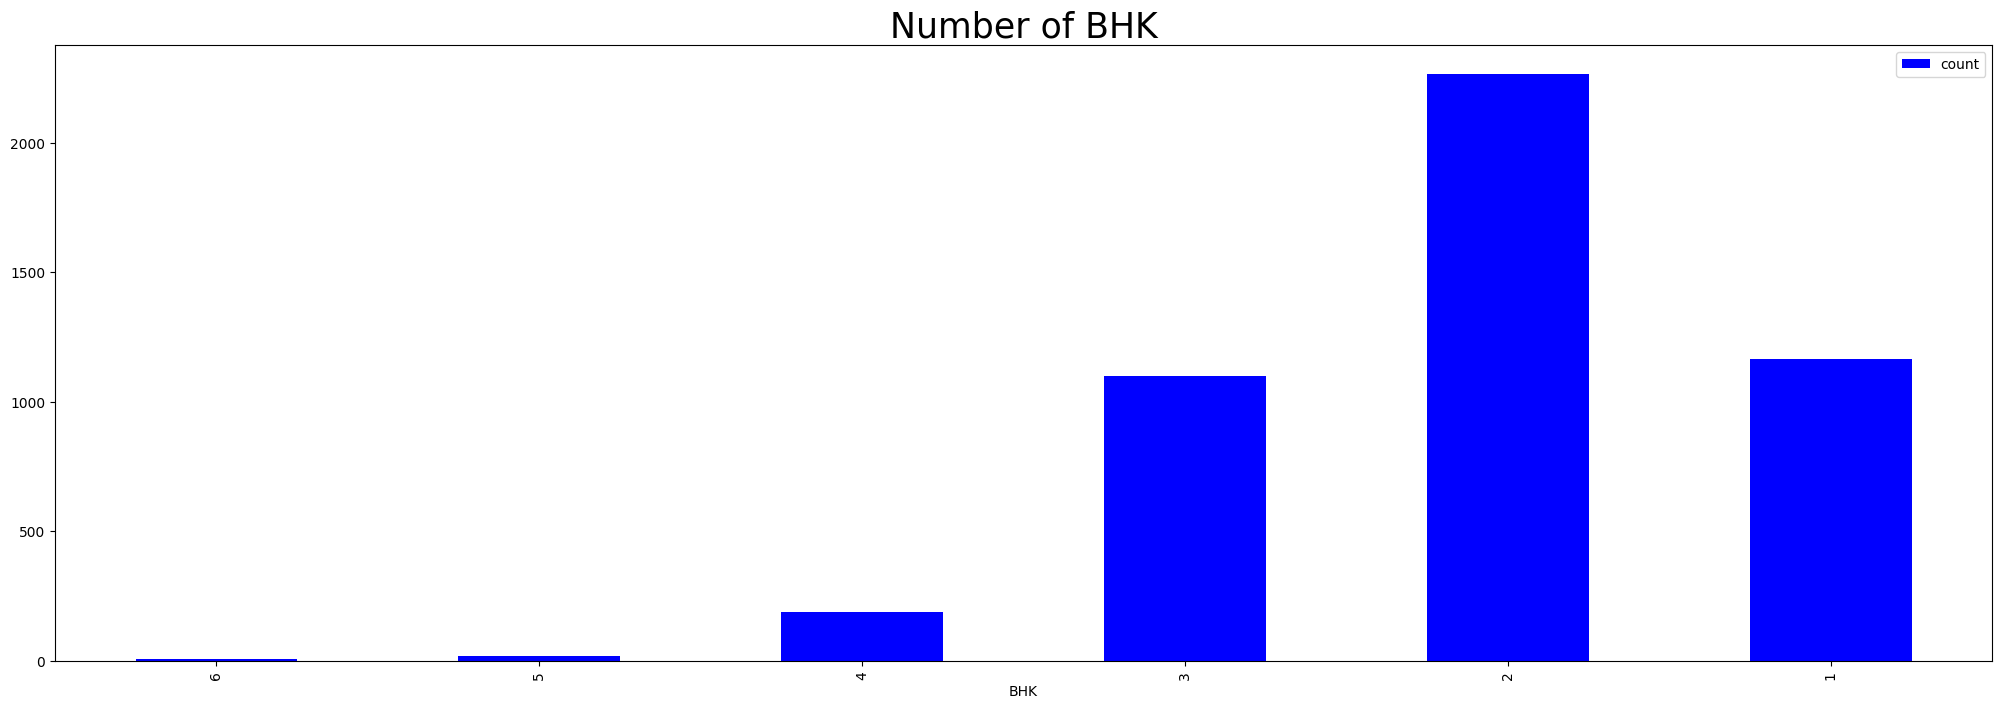

In [106]:
#plotting

bhk_count.plot(figsize= (25,8), kind = 'bar', color = 'blue')
plt.title('Number of BHK', size = 25)

* The above shows that houses with two BHK are more than other houses while houses with six BHK are the least

* Floors

In [13]:
# The first twenty highest number of floors

floor_count = data['Floor'].value_counts().sort_values(ascending = False).head(10).to_frame()
floor_count

,count
Floor,
1 out of 2,379
Ground out of 2,350
2 out of 3,312
2 out of 4,308
1 out of 3,293
3 out of 4,239
Ground out of 3,209
1 out of 4,200
Ground out of 1,195


In [14]:
# Leats 5 floors
floor_least = data['Floor'].value_counts().sort_values(ascending = True).head(5).to_frame()
floor_least

,count
Floor,
9 out of 35,1
11 out of 35,1
15 out of 29,1
15 out of 30,1
Ground out of 18,1


###### Note;
* 1 out of 2 has the highest floors
* while 9 out of 35 and so many others has the least floors


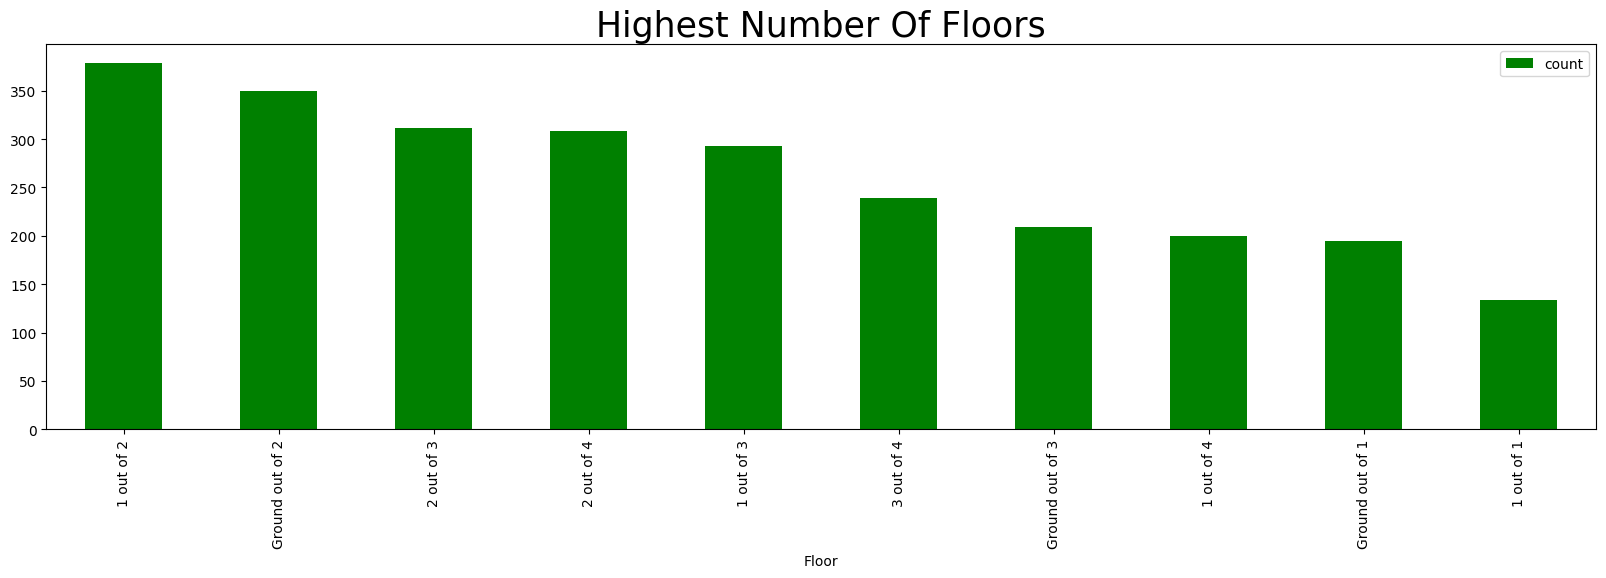

In [15]:
# Plotting the highest floors
floor_count.plot(kind = 'bar', figsize = (20,5), color = 'Green')
plt.title('Highest Number Of Floors', size = 25)
plt.show()

* Area Type

In [16]:
area_type_counts = data['Area Type'].value_counts().sort_values(ascending = False).to_frame()
area_type_counts

,count
Area Type,
Super Area,2446
Carpet Area,2298
Built Area,2


######  Note:
* They are more houses in Area type (Super)
* They are few houses in area type (Built)
* The Differences in the houses may be due to development or maybe readily availability of social amenities which is not included in this dataset.

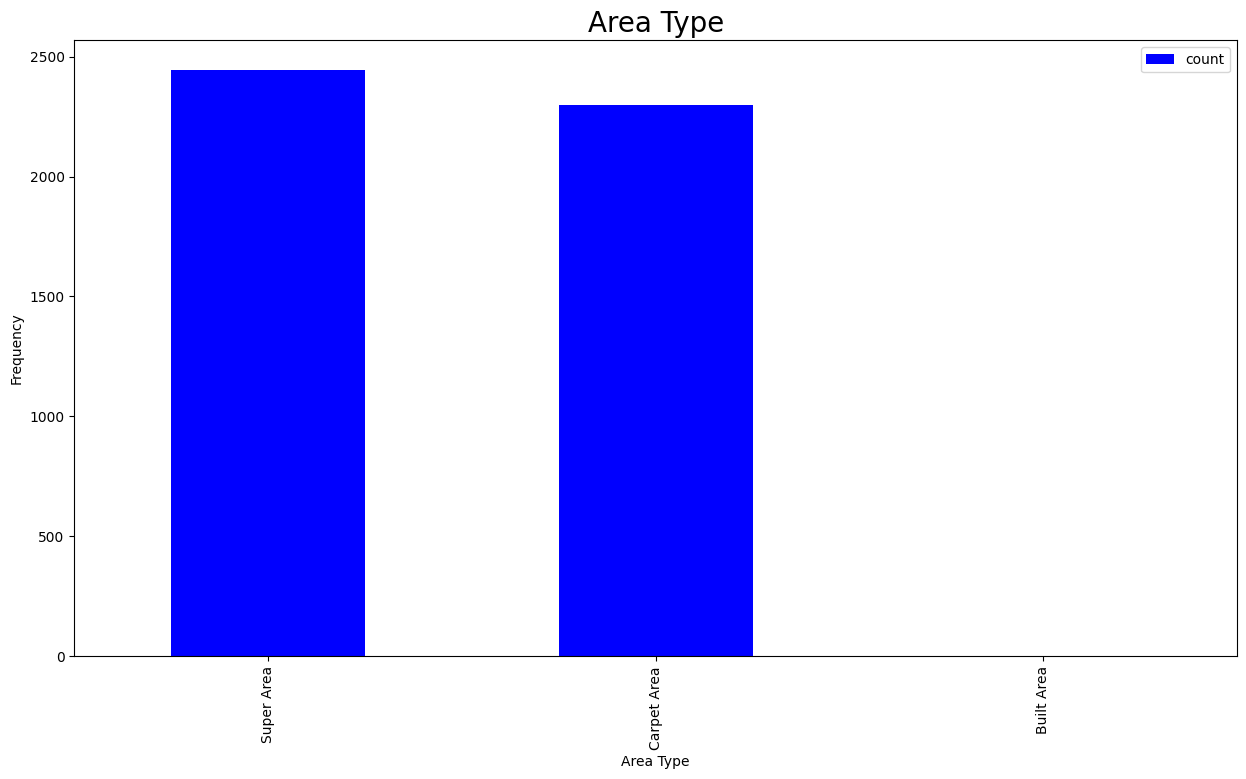

In [107]:
# plotting 
area_type_counts.plot(kind = 'bar', figsize = (15,8), color = 'Blue')
plt.ylabel("Frequency")
plt.title('Area Type', size = 20)
plt.show()

* Area Locality

In [18]:
area_loc_top = data['Area Locality'].value_counts().sort_values(ascending = False).head(20).to_frame()
area_loc_top

,count
Area Locality,
Bandra West,37
Gachibowli,29
Electronic City,24
Velachery,22
"Miyapur, NH 9",22
Madipakkam,20
Chembur,19
Laxmi Nagar,19
K R Puram,19


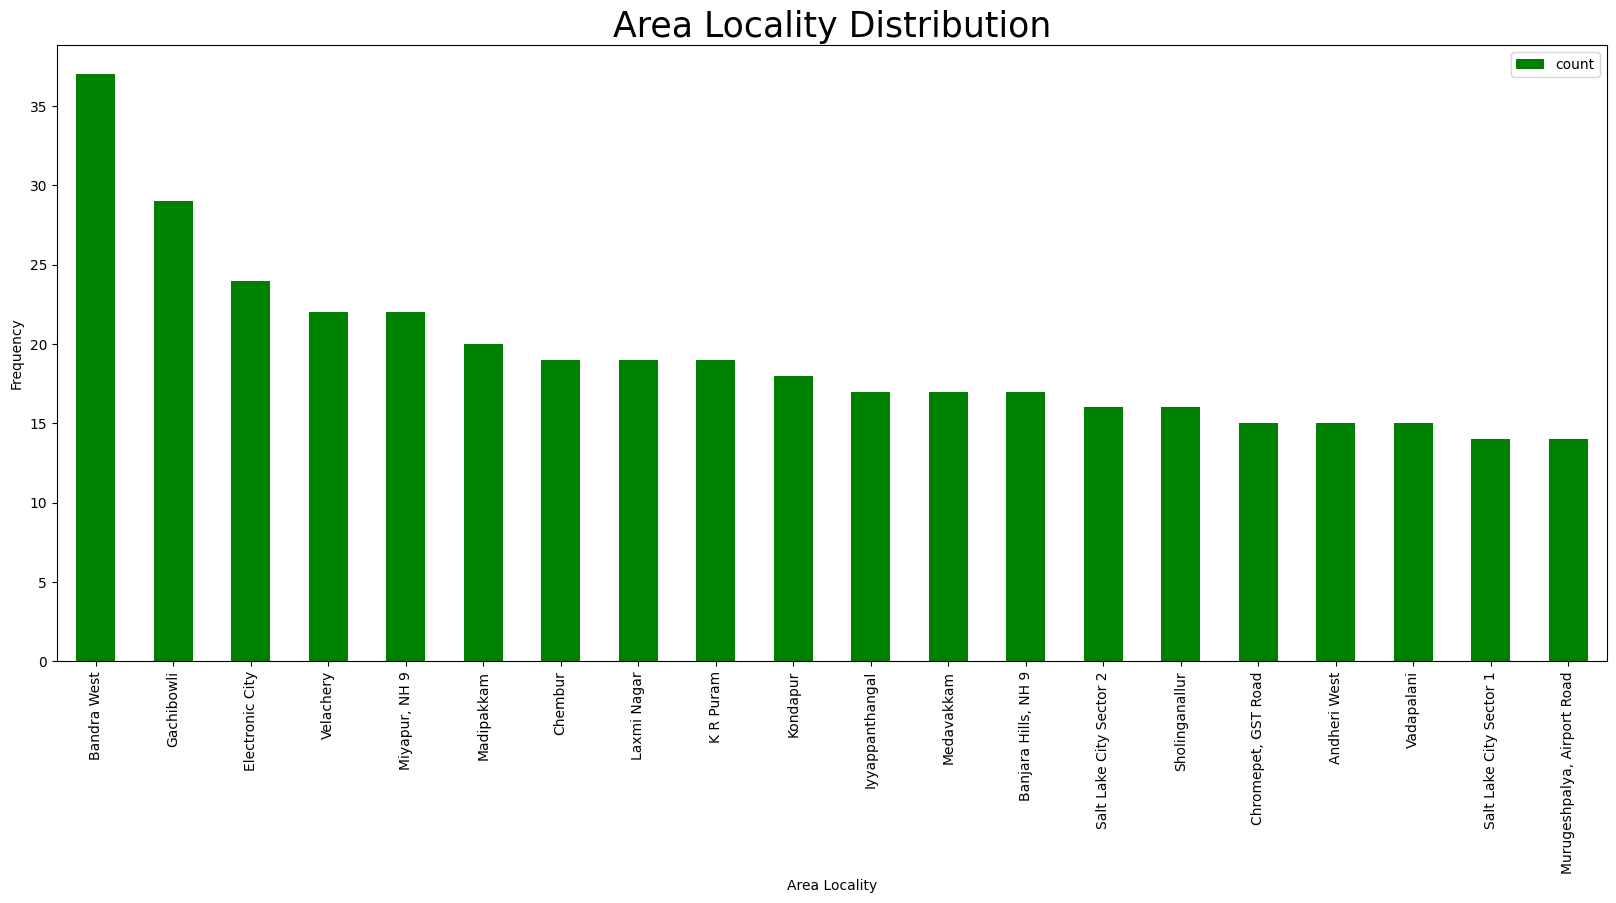

In [110]:
#plotting area location

area_loc_top.plot(kind = 'bar', color = 'green',figsize = (20,8))
plt.title('Area Locality Distribution', size = 25)
plt.ylabel("Frequency")
plt.show()

* Base on Area Locality, the locality with the highest houses is Bandra West

* City

In [20]:
city_counts = data['City'].value_counts().sort_values(ascending = False).to_frame()
city_counts

,count
City,
Mumbai,972
Chennai,891
Bangalore,886
Hyderabad,868
Delhi,605
Kolkata,524


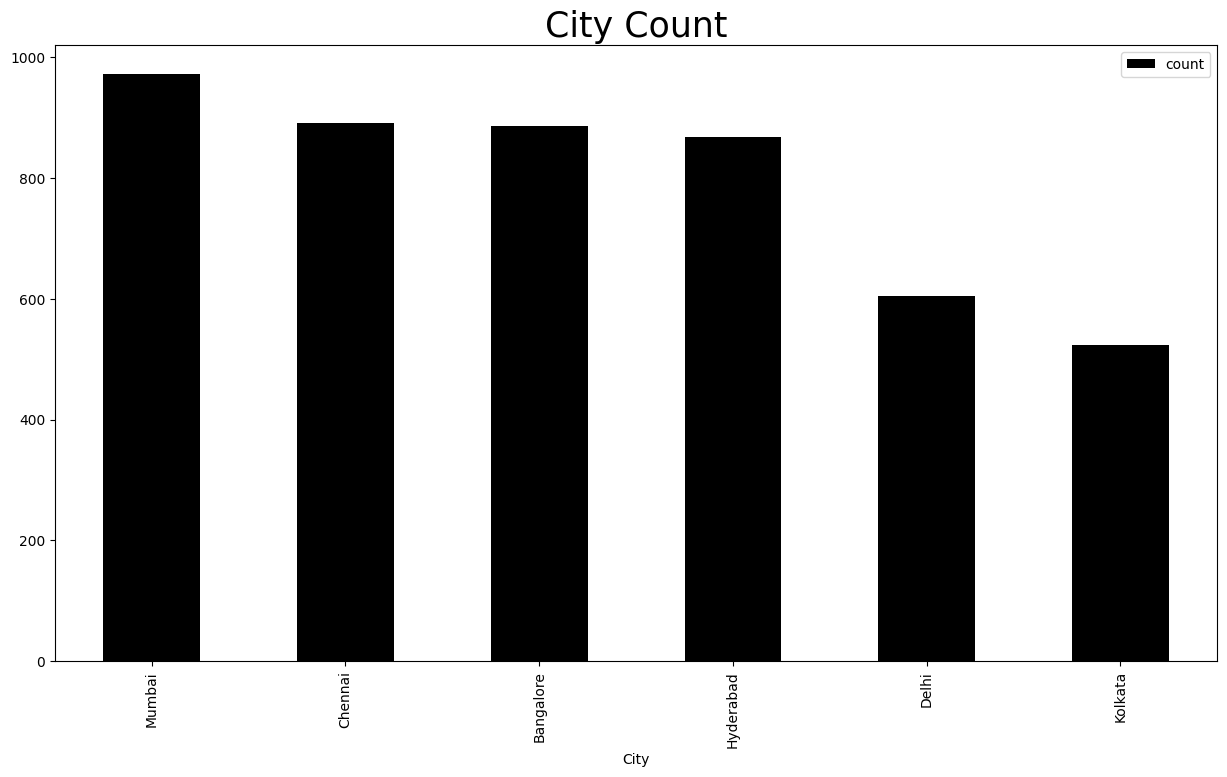

In [21]:
city_counts.plot(kind = 'bar', color = 'black', figsize = (15,8))
plt.title('City Count', size = 25)
plt.show()

* Base on City, they ae more houses in Mumbai than every other Cities, while they ae lesser number of houses in Kolkata.

* Furnishing Status

In [22]:
data['Furnishing Status'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [23]:
furn_counts = data['Furnishing Status'].value_counts().sort_values().to_frame()
furn_counts

,count
Furnishing Status,
Furnished,680
Unfurnished,1815
Semi-Furnished,2251


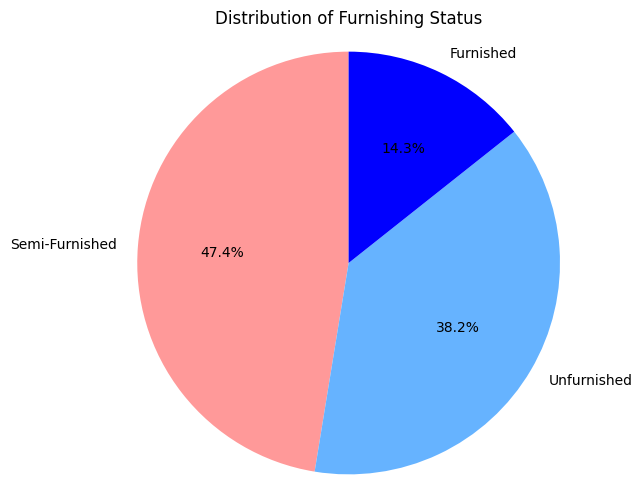

In [24]:
furn_counts = df['Furnishing Status'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(furn_counts.values, labels=furn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','blue','green'])
plt.title('Distribution of Furnishing Status')
plt.axis('equal')  
plt.show()

* They are more semi-furnished houses in the dataset than furnished and unfurnished houses

* Tenant Preferred

In [25]:
data['Tenant Preferred'].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [26]:
ten_counts = data['Tenant Preferred'].value_counts().to_frame()
ten_counts

,count
Tenant Preferred,
Bachelors/Family,3444
Bachelors,830
Family,472


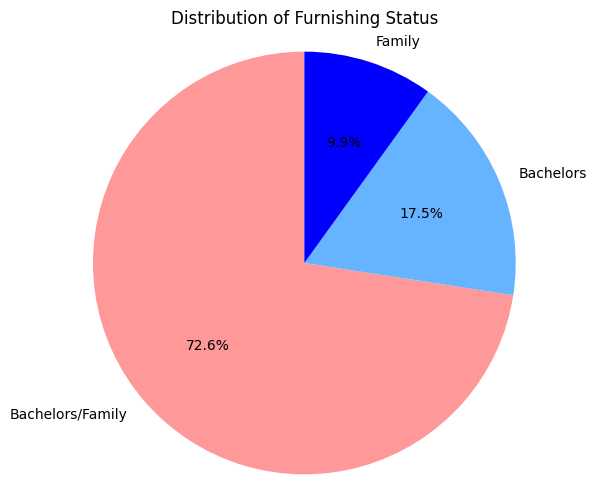

In [27]:
ten_counts = df['Tenant Preferred'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(ten_counts.values, labels=ten_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','blue','green'])
plt.title('Distribution of Furnishing Status')
plt.axis('equal')  
plt.show()

* Base on Preferred tenants, There are more number of Bachelors/family than every other.

* Bathroom

In [28]:
data['Bathroom'].unique()

array([ 2,  1,  3,  5,  4,  6,  7, 10], dtype=int64)

In [29]:
bathroom_counts = data['Bathroom'].value_counts().sort_values(ascending = False).to_frame()
bathroom_counts

,count
Bathroom,
2,2291
1,1474
3,749
4,156
5,60
6,12
7,3
10,1


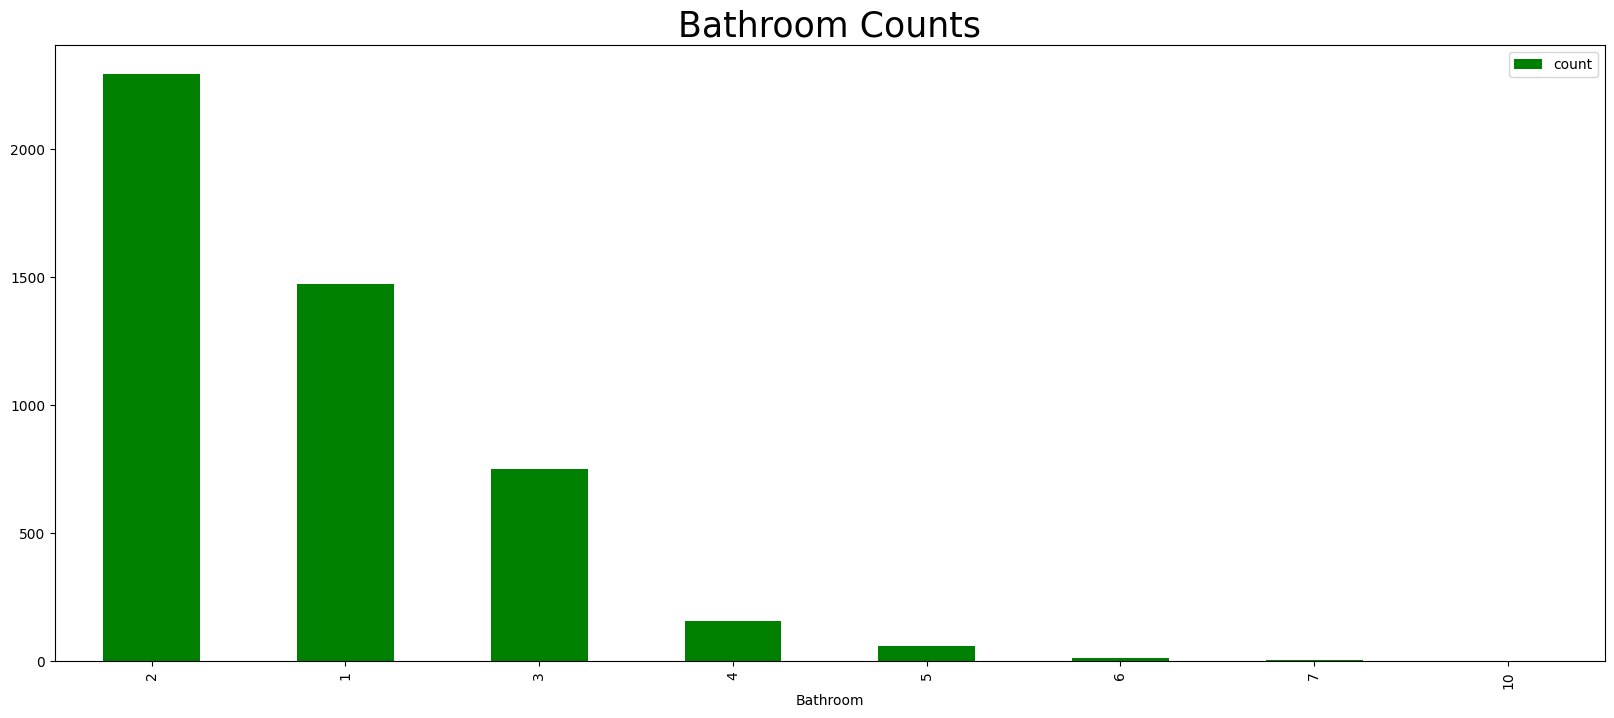

In [30]:
#  plotting the bathroom

bathroom_counts.plot(kind = 'bar', color = 'green', figsize = (20,8))
plt.title('Bathroom Counts', size = 25)
plt.show()

* Houses with two bathrooms are more than others

* Point of contact

In [31]:
data['Point of Contact'].unique()

array(['Contact Owner', 'Contact Agent', 'Contact Builder'], dtype=object)

In [32]:
point_c = data['Point of Contact'].value_counts().to_frame()
point_c

,count
Point of Contact,
Contact Owner,3216
Contact Agent,1529
Contact Builder,1


* Contact owners has the highest number of houses
* Contact agents has the second highest number of houses
* While the contact builder has just one

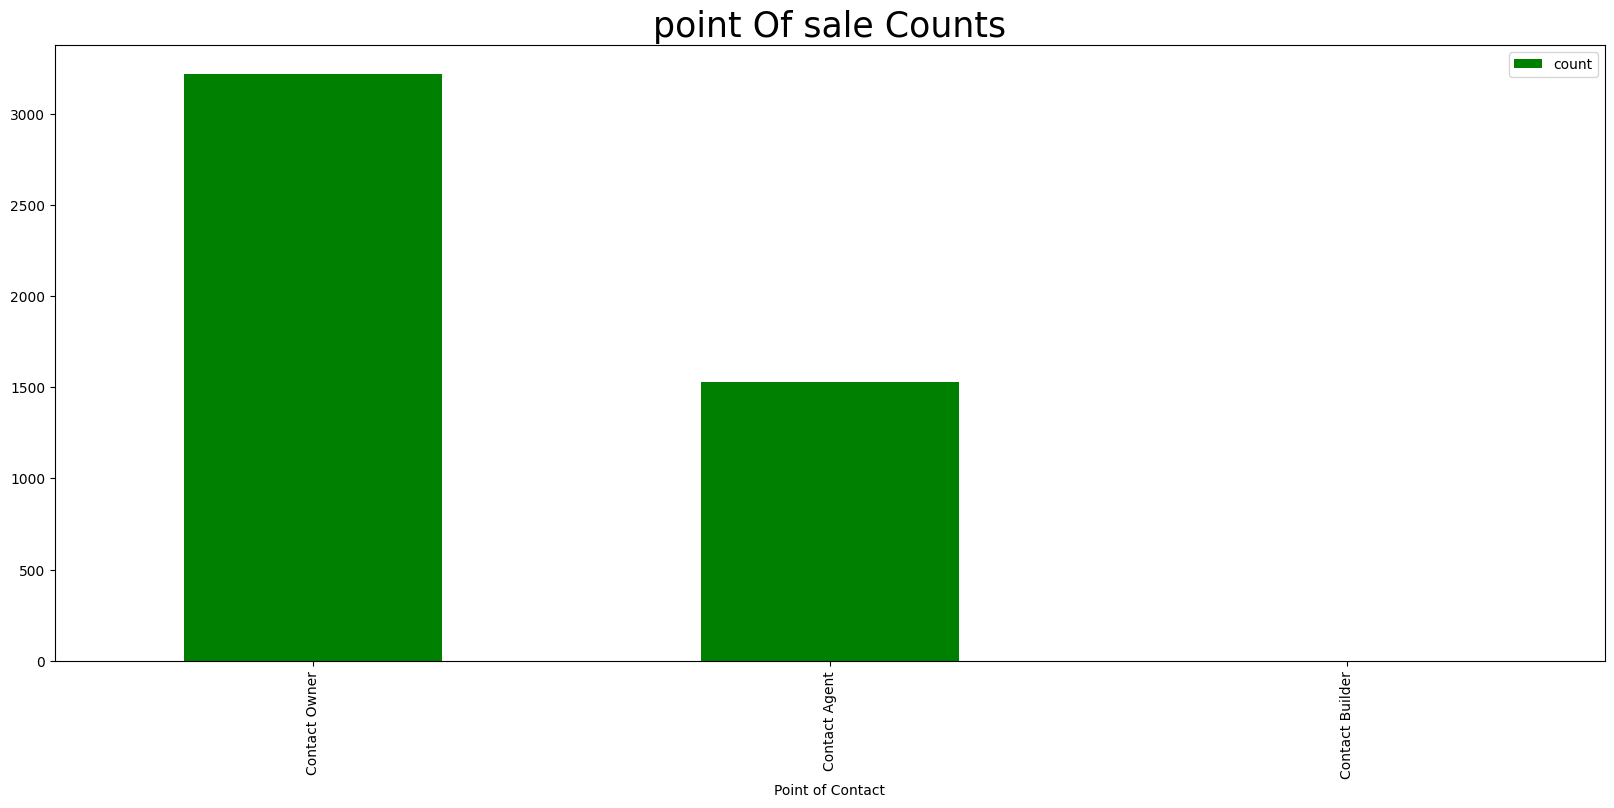

In [33]:
#  plotting the bathroom

point_c.plot(kind = 'bar', color = 'green', figsize = (20,8))
plt.title('point Of sale Counts', size = 25)
plt.show()

* Posted On

In [34]:
data['Posted On'].nunique()

81

In [35]:
posted_on_counts = data['Posted On'].value_counts().sort_values(ascending = False).head(10).to_frame()
posted_on_counts

,count
Posted On,
2022-07-06,311
2022-05-12,149
2022-06-04,135
2022-07-09,126
2022-05-23,125
2022-05-27,125
2022-04-29,114
2022-07-07,112
2022-06-20,111


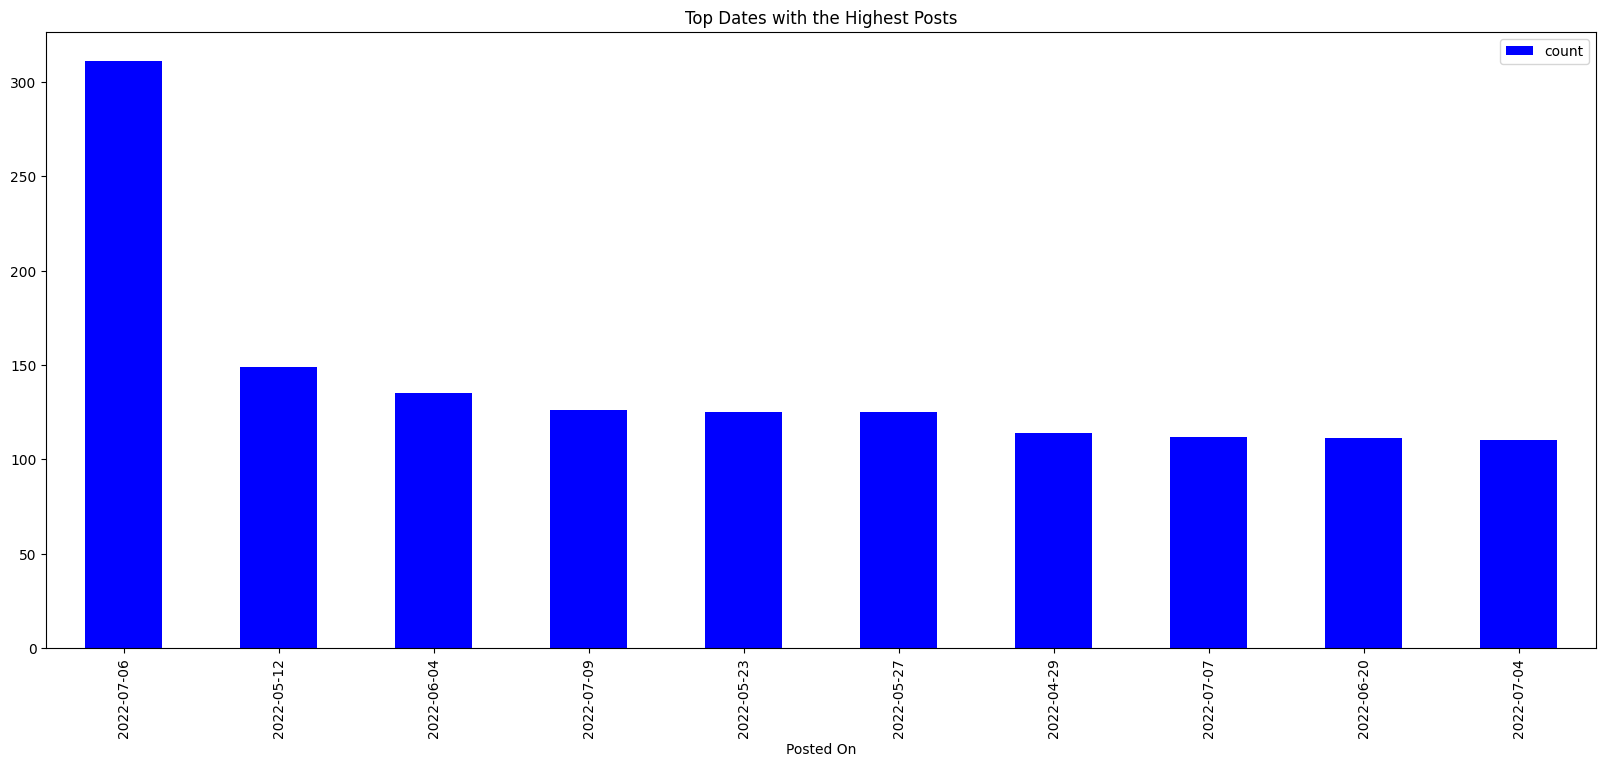

In [36]:
posted_on_counts.plot(kind = 'bar', figsize = (20,8), color = 'blue')
plt.title('Top Dates with the Highest Posts')
plt.show()

* The analysis of the posted on shows the highest number of houses posted in a particular date.
* The analysis above shows the date with the highest number of houses.

###### Relationship between Columns and Price

* BHK And RENT

In [37]:
bhk_Rent_top = data.groupby('BHK')['Rent'].max().sort_values(ascending = False).head(5).to_frame()
bhk_Rent_top

,Rent
BHK,
3,3500000
4,1200000
5,650000
2,600000
6,280000


* Bathroom And Rent

In [38]:
bath_Rent_top = data.groupby('Bathroom')['Rent'].max().sort_values(ascending = False).head(10).to_frame()
bath_Rent_top

,Rent
Bathroom,
3,3500000
4,1200000
5,680000
2,600000
6,400000
10,200000
7,150000
1,100000


Size and rent

In [39]:
size_Rent_top = data.groupby('Size')['Rent'].max().sort_values(ascending = False).head(10).to_frame()
size_Rent_top

,Rent
Size,
2500,3500000
5000,1200000
3064,1000000
3200,850000
1962,680000
3000,650000
950,600000
4500,600000
4000,530000


* Area Type and Rent

In [40]:
Area_Rent_top = data.groupby('Area Type')['Rent'].max().sort_values(ascending = False).head(10).to_frame()
Area_Rent_top

,Rent
Area Type,
Carpet Area,3500000
Super Area,350000
Built Area,15000


* Area Locality

In [41]:
Area_Locality_Rent_top = data.groupby('Area Locality')['Rent'].max().sort_values(ascending = False).head(10).to_frame()
Area_Locality_Rent_top

,Rent
Area Locality,
Marathahalli,3500000
Juhu,1200000
"Raheja Artesia, Worli",1000000
Breach Candy,850000
"Lady Ratan Tower, Worli",700000
Khar West,680000
"Mount Marry, Bandra West",600000
Bandra West,600000
Vettuvankeni,600000


* City And Rent

In [42]:
city_Rent_top = data.groupby('City')['Rent'].max().sort_values(ascending = False).to_frame()
city_Rent_top

,Rent
City,
Bangalore,3500000
Mumbai,1200000
Chennai,600000
Delhi,530000
Hyderabad,400000
Kolkata,180000


* Furnishing Status and Rent

In [43]:
furn_Rent_top = data.groupby('Furnishing Status')['Rent'].max().sort_values(ascending = False).head(10).to_frame()
furn_Rent_top

,Rent
Furnishing Status,
Semi-Furnished,3500000
Furnished,850000
Unfurnished,600000


* Tenant preferred

In [44]:
tent_Rent_top = data.groupby('Tenant Preferred')['Rent'].max().sort_values(ascending = False).head(10).to_frame()
tent_Rent_top

,Rent
Tenant Preferred,
Bachelors,3500000
Bachelors/Family,1200000
Family,1000000


* Point of Contact

In [45]:
point_Rent_top = data.groupby('Point of Contact')['Rent'].max().sort_values(ascending = False).to_frame()
point_Rent_top

,Rent
Point of Contact,
Contact Agent,3500000
Contact Owner,600000
Contact Builder,5500


######  Regression / Correlational Analysis

Size And Rent

In [46]:
po_rent_corr = data[['Size','Rent']].corr()
po_rent_corr

,Size,Rent
Size,1.000000,0.413551
Rent,0.413551,1.000000


<Axes: xlabel='Rent', ylabel='Size'>

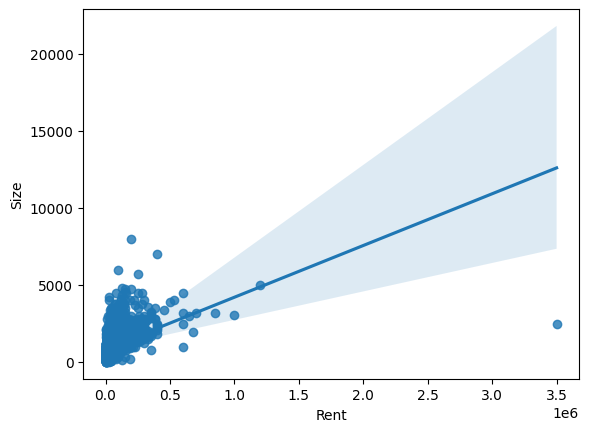

In [47]:
sns.regplot(x = 'Rent', y = 'Size', data = data)

* There is a positive relationship between the Rent and the size. This means that the higher the size of the house, the higher the rent

* Bathroom And Rent

<Axes: xlabel='Bathroom', ylabel='Rent'>

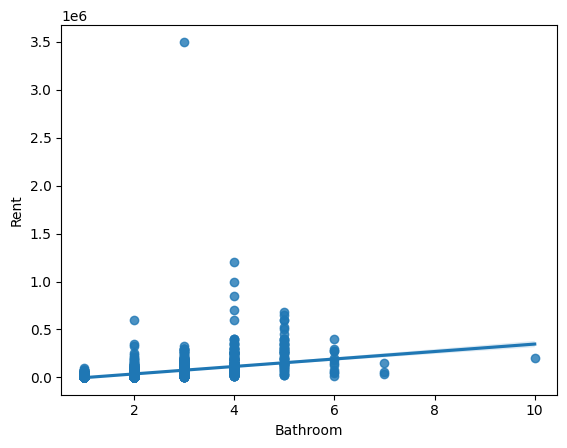

In [48]:
sns.regplot(x='Bathroom',y='Rent', data = data)

In [49]:
bath_cor = data[['Bathroom','Rent']].corr()
bath_cor

,Bathroom,Rent
Bathroom,1.000000,0.441215
Rent,0.441215,1.000000


* There is a moderate positive relationship between Bathroom and Rent.
* This means that the higher the number of bathrooms in a house the hiher the rent

BHK and RENT

In [50]:
bhk_corr = data[['BHK','Rent']].corr()
bhk_corr

,BHK,Rent
BHK,1.000000,0.369718
Rent,0.369718,1.000000


<Axes: xlabel='BHK', ylabel='Rent'>

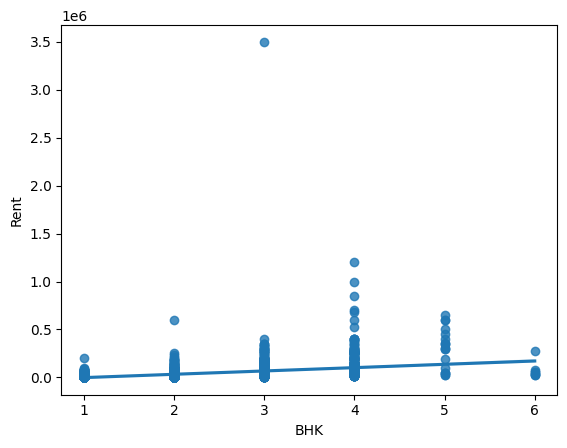

In [51]:
sns.regplot(x = 'BHK', y = 'Rent', data = data)

* There is also a positive moderate relationship between BHK and Rent. This means that the higher the BHK,the higher the Rent

###### Correlation summary

In [52]:
matrix_cor = data.corr(numeric_only = True)
matrix_cor

,BHK,Rent,Size,Bathroom
BHK,1.000000,0.369718,0.716145,0.794885
Rent,0.369718,1.000000,0.413551,0.441215
Size,0.716145,0.413551,1.000000,0.740703
Bathroom,0.794885,0.441215,0.740703,1.000000


<Axes: >

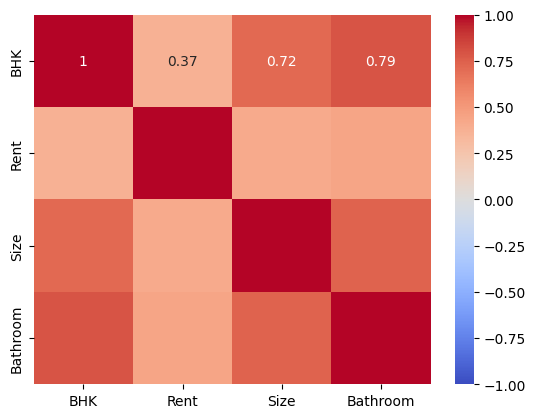

In [53]:
sns.heatmap(matrix_cor, vmin=-1, vmax = 1, annot = True, cmap = 'coolwarm')

* There is no negative relationship amongst the numerical variables.
* This may also post multicollinearity,but that wil be dealt with during prepocessing

###### Using Pair Plots

C:\Users\JAMES TECH\Documents\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\JAMES TECH\Documents\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\JAMES TECH\Documents\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\JAMES TECH\Documents\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

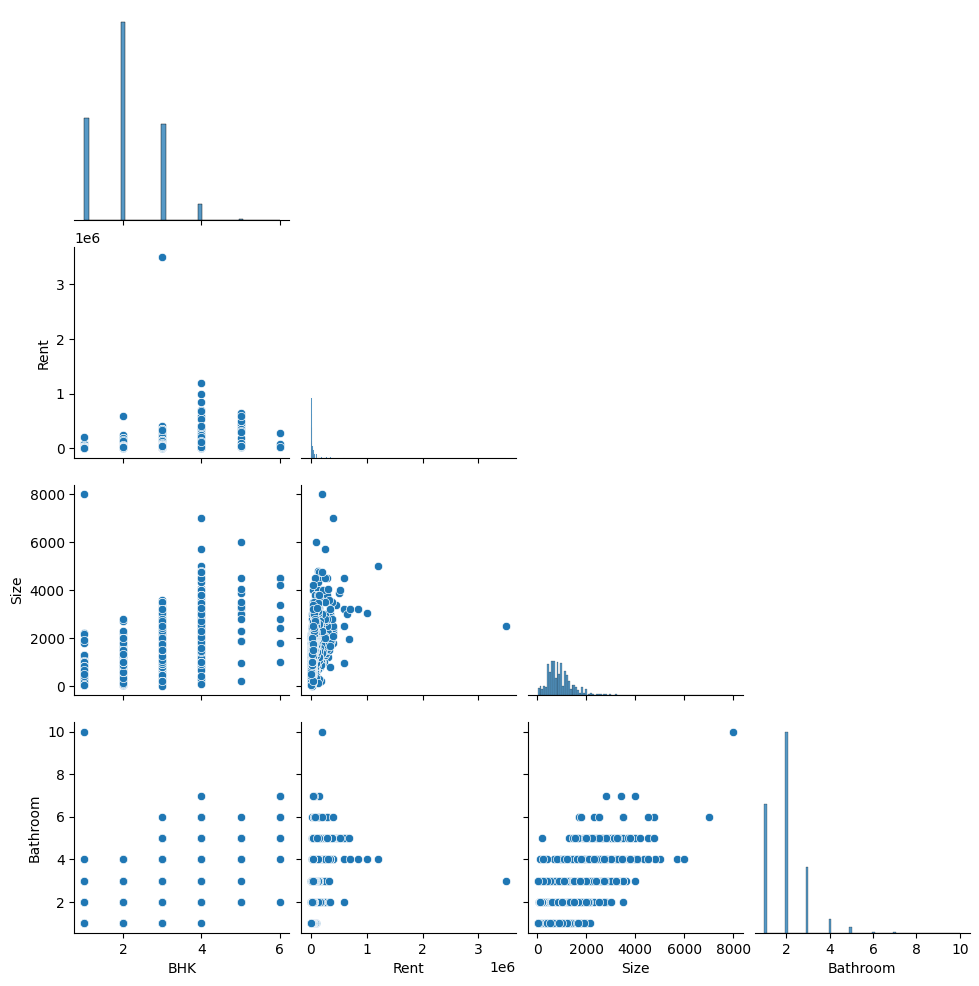

In [54]:
sns.pairplot(data, corner = True)

######  Machine Learning

###### Preprocessing 

In [55]:
df_pre = df.copy()

In [56]:
df_pre.describe(include = 'all')

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
count,4746,4746.000000,4.746000e+03,4746.000000,4746,4746,4746,4746,4746,4746,4746.000000,4746
unique,81,NaN,NaN,NaN,480,3,2235,6,3,3,NaN,3
top,2022-07-06,NaN,NaN,NaN,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,NaN,Contact Owner
freq,311,NaN,NaN,NaN,379,2446,37,972,2251,3444,NaN,3216
mean,NaN,2.083860,3.499345e+04,967.490729,NaN,NaN,NaN,NaN,NaN,NaN,1.965866,NaN
std,NaN,0.832256,7.810641e+04,634.202328,NaN,NaN,NaN,NaN,NaN,NaN,0.884532,NaN
min,NaN,1.000000,1.200000e+03,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,2.000000,1.000000e+04,550.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
50%,NaN,2.000000,1.600000e+04,850.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
75%,NaN,3.000000,3.300000e+04,1200.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN


* posted on has 81 unique values, Floor has 480 unique values while Area Locality has 2235 unique values.
* This columns with so many unique values will affect our predictions

In [57]:
#dropping the columns
df_cleaned = df_pre.drop(['Posted On','Floor','Area Locality'], axis = 1, inplace = True)

In [58]:
df_pre.head()

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner


* Outliers Treatment

C:\Users\JAMES TECH\Documents\New folder\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

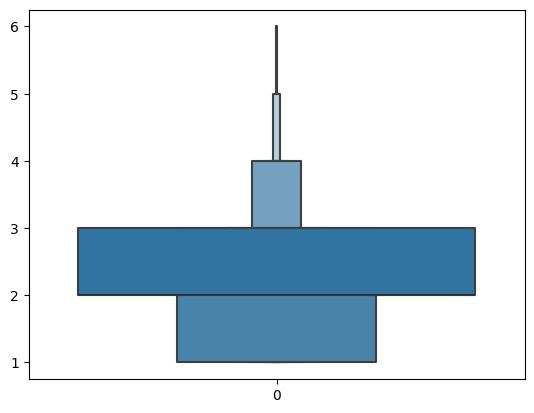

In [59]:
sns.boxenplot(df_pre['BHK'])

* No outliers

C:\Users\JAMES TECH\Documents\New folder\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

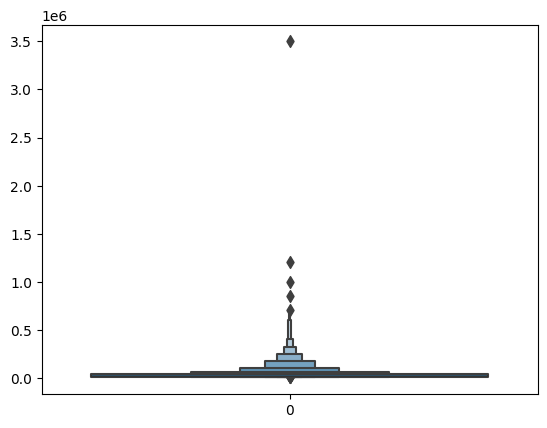

In [60]:
sns.boxenplot(df_pre['Rent'])

C:\Users\JAMES TECH\AppData\Local\Temp\ipykernel_7748\722567172.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pre['Rent'])
C:\Users\JAMES TECH\Documents\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rent', ylabel='Density'>

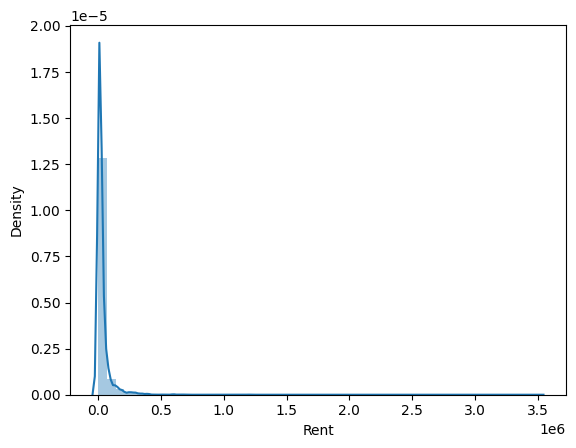

In [61]:
sns.distplot(df_pre['Rent'])

* There are outliers in the Rent column

In [62]:
q = df_pre['Rent'].quantile(0.99)
df_1 =df_pre[df_pre['Rent']<q]


C:\Users\JAMES TECH\Documents\New folder\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

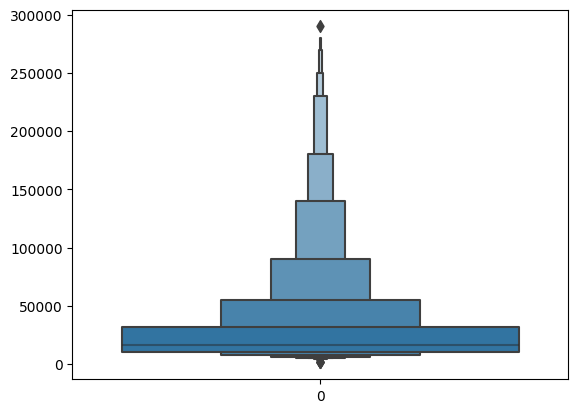

In [63]:
sns.boxenplot(df_1['Rent'])

C:\Users\JAMES TECH\AppData\Local\Temp\ipykernel_7748\4163610680.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['Rent'])
C:\Users\JAMES TECH\Documents\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rent', ylabel='Density'>

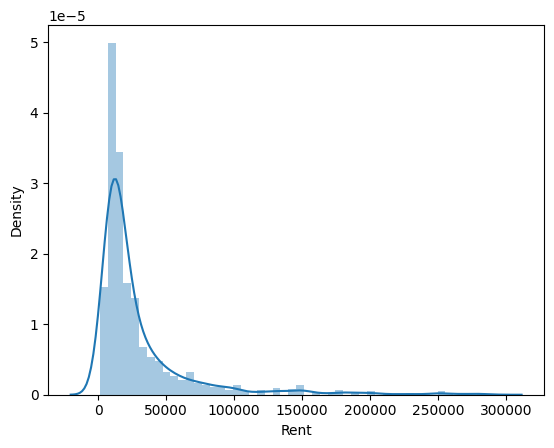

In [64]:
sns.distplot(df_1['Rent'])

* Bathroom

C:\Users\JAMES TECH\Documents\New folder\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

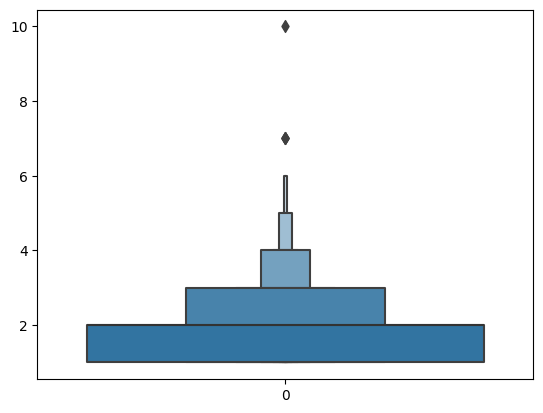

In [65]:
sns.boxenplot(df_1['Bathroom'])

In [66]:
q = df_1['Bathroom'].quantile(0.99)
df_2 =df_1[df_1['Bathroom']<q]

* Size

C:\Users\JAMES TECH\Documents\New folder\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

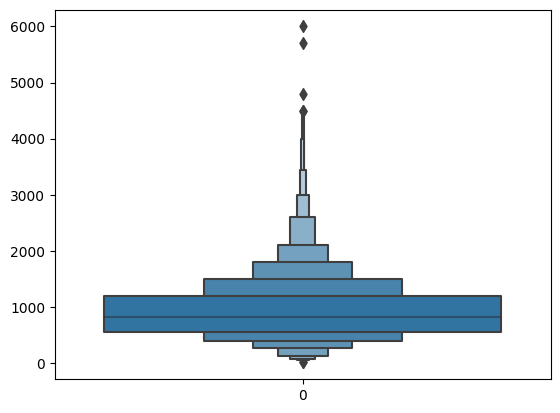

In [67]:
sns.boxenplot(df_2['Size'])

In [68]:
q = df_2['Size'].quantile(0.99)
df_3 =df_2[df_2['Size']<q]

In [69]:
df_process = df_3.copy()


In [70]:
df_process.describe()

,BHK,Rent,Size,Bathroom
count,4588.000000,4588.000000,4588.000000,4588.000000
mean,2.021796,27542.048823,898.542502,1.882084
std,0.761772,33931.385410,483.100099,0.745776
min,1.000000,1200.000000,10.000000,1.000000
25%,1.000000,10000.000000,550.000000,1.000000
50%,2.000000,15000.000000,800.000000,2.000000
75%,3.000000,30000.000000,1180.000000,2.000000
max,6.000000,290000.000000,2780.000000,4.000000


######  Assumptions

* Linearity

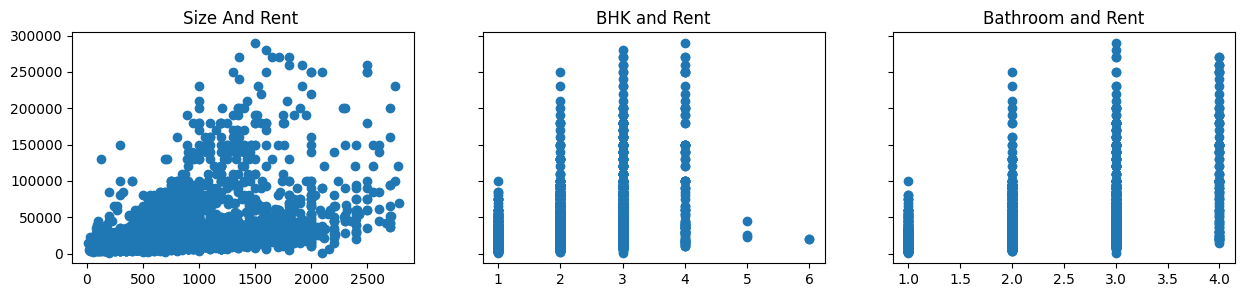

In [71]:
f,(ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize = (15,3))
ax1.scatter(df_process['Size'], df_process['Rent'])
ax1.set_title('Size And Rent ')
ax2.scatter(df_process['BHK'], df_process['Rent'])
ax2.set_title('BHK and Rent')
ax3.scatter(df_process['Bathroom'], df_process['Rent'])
ax3.set_title('Bathroom and Rent')

plt.show()

* The above is not linear
* So, we will have to  relax the assumption

In [72]:
log_Rent = np.log(df_process['Rent'])
df_process['log_Rent'] = log_Rent

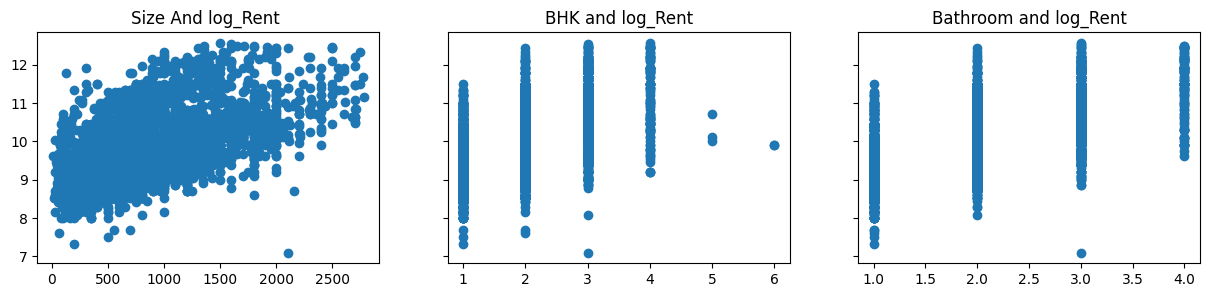

In [73]:
f,(ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize = (15,3))
ax1.scatter(df_process['Size'], df_process['log_Rent'])
ax1.set_title('Size And log_Rent ')
ax2.scatter(df_process['BHK'], df_process['log_Rent'])
ax2.set_title('BHK and log_Rent')
ax3.scatter(df_process['Bathroom'], df_process['log_Rent'])
ax3.set_title('Bathroom and log_Rent')

plt.show()

* Linearity satisfied

In [74]:
#drop the rent column
df_process = df_process.drop(columns=['Rent'], axis=1)

In [75]:
df_process.head()

,BHK,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,log_Rent
0,2,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,9.210340
1,2,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,9.903488
2,2,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,9.740969
3,2,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,9.210340
4,2,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,8.922658


* Multicollinearity

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = df_process[['BHK','Size','Bathroom']]
vif = pd.DataFrame()
vif['VIF'] =[variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [77]:
vif

,VIF,Features
0,19.550393,BHK
1,9.829866,Size
2,18.752358,Bathroom


* The BHK and The Bathroom has high multicollinearity and as such should be dropped

In [78]:
#drop BHK and Bathroom
df_process.drop(['BHK', 'Bathroom'], axis=1, inplace=True)


In [79]:
df_process.head()

,Size,Area Type,City,Furnishing Status,Tenant Preferred,Point of Contact,log_Rent
0,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,Contact Owner,9.210340
1,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner,9.903488
2,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner,9.740969
3,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,Contact Owner,9.210340
4,850,Carpet Area,Kolkata,Unfurnished,Bachelors,Contact Owner,8.922658


##### Creating Dummies

In [80]:
df_dumy = pd.get_dummies(df_process, drop_first = True)*1

In [81]:
df_dumy.head()

,Size,log_Rent,Area Type_Carpet Area,Area Type_Super Area,City_Chennai,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,1100,9.210340,0,1,0,0,0,1,0,0,1,1,0,0,1
1,800,9.903488,0,1,0,0,0,1,0,1,0,1,0,0,1
2,1000,9.740969,0,1,0,0,0,1,0,1,0,1,0,0,1
3,800,9.210340,0,1,0,0,0,1,0,0,1,1,0,0,1
4,850,8.922658,1,0,0,0,0,1,0,0,1,0,0,0,1


In [82]:
df_final = df_dumy.copy()

######  Standardization

In [83]:
target = df_final['log_Rent']
features = df_final.drop(['log_Rent'], axis = 1)

* Using standard scaler

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
#initialize the scaler
scaler = StandardScaler()
#fit the features
scaler.fit(features)

StandardScaler()

In [86]:
scaled_features = scaler.transform(features)
scaled_features

array([[ 0.4170553 , -0.9502341 ,  0.95106503, ..., -0.32732684,
        -0.01476507,  0.66370351],
       [-0.2040017 , -0.9502341 ,  0.95106503, ..., -0.32732684,
        -0.01476507,  0.66370351],
       [ 0.2100363 , -0.9502341 ,  0.95106503, ..., -0.32732684,
        -0.01476507,  0.66370351],
       ...,
       [ 1.7626788 ,  1.05237226, -1.05145281, ..., -0.32732684,
        -0.01476507, -1.50669686],
       [ 1.2451313 ,  1.05237226, -1.05145281, ...,  3.05505046,
        -0.01476507, -1.50669686],
       [ 0.2100363 ,  1.05237226, -1.05145281, ..., -0.32732684,
        -0.01476507,  0.66370351]])

######  Data Splitting

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
x_train,x_test,y_train,y_test = train_test_split(scaled_features, target,test_size = 0.2, random_state=200)

######  Creating a regression model

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [91]:
y_hat = model.predict(x_train)

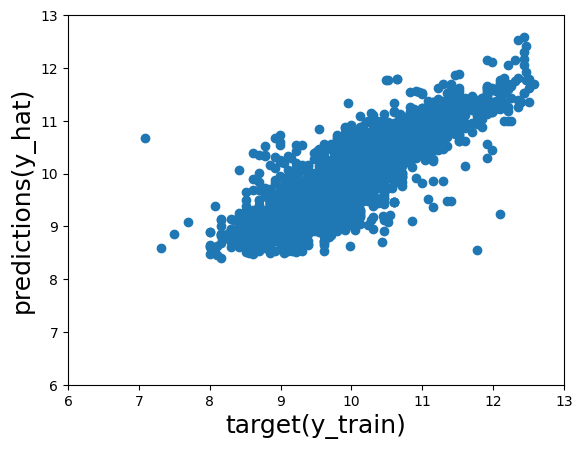

In [92]:
plt.scatter(y_train, y_hat)
plt.xlabel('target(y_train)',size = 18)
plt.ylabel('predictions(y_hat)',size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

* The model has past the homoscedacity test

###### Test with residuals plotting

C:\Users\JAMES TECH\AppData\Local\Temp\ipykernel_7748\835777048.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_hat)
C:\Users\JAMES TECH\Documents\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


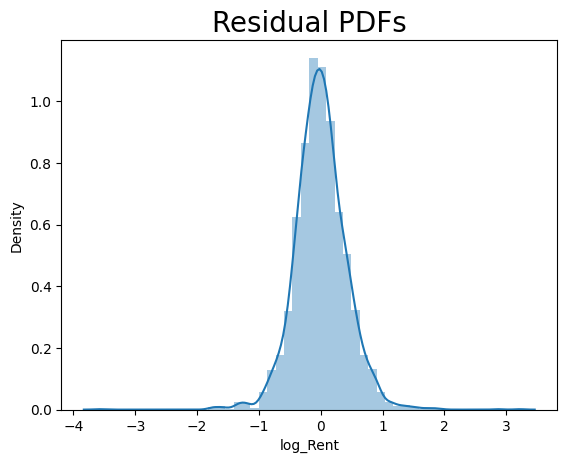

In [93]:
sns.distplot(y_train-y_hat)
plt.title('Residual PDFs', size = 20)
plt.show()

* The residual plot is normal
* But there is a little overesimation at the left side.

######  Scorring the model

R2

In [94]:
model.score(x_train,y_train)

0.7523194542338011

* Weight Bias

In [95]:
model.intercept_

9.797623114746528

In [96]:
model.coef_

array([ 0.427644  ,  0.10961141,  0.06673556,  0.0072755 ,  0.0951936 ,
       -0.04356814, -0.08062333,  0.436876  , -0.09034699, -0.14117204,
       -0.01094036, -0.02008964, -0.00787178, -0.16048277])

In [97]:
# creating a summary table
model_summary = pd.DataFrame(features.columns.values, columns = ['Features'])
model_summary['Weights'] = model.coef_
model_summary

,Features,Weights
0,Size,0.427644
1,Area Type_Carpet Area,0.109611
2,Area Type_Super Area,0.066736
3,City_Chennai,0.007276
4,City_Delhi,0.095194
5,City_Hyderabad,-0.043568
6,City_Kolkata,-0.080623
7,City_Mumbai,0.436876
8,Furnishing Status_Semi-Furnished,-0.090347
9,Furnishing Status_Unfurnished,-0.141172


* Negative means the target decreases as the feature increases
* Positive weght means that the target increases as the feature increases

######  Testing The model


In [98]:
y_hat_test = model.predict(x_test)

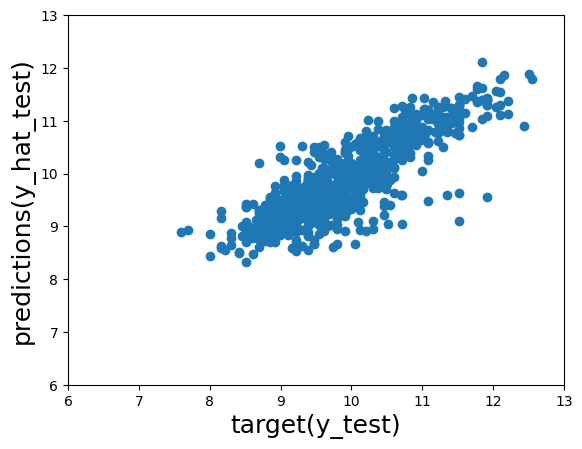

In [99]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('target(y_test)',size = 18)
plt.ylabel('predictions(y_hat_test)',size = 18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

* DataFrame performance

In [100]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns = ['Predictions'])
df_pf.head(10)

,Predictions
0,13111.699670
1,15200.211941
2,9428.315126
3,7501.978438
4,5995.247530
5,5383.894025
6,8234.708682
7,5716.912707
8,73552.152848
9,9775.053522


In [101]:
y_test = y_test.reset_index(drop = True)
y_test

0       9.392662
1       9.159047
2       9.305651
3       8.987197
4       8.517193
         ...    
913     9.433484
914     8.779557
915    10.545341
916     9.472705
917    11.608236
Name: log_Rent, Length: 918, dtype: float64

######  Residuals

In [102]:
df_pf['Target'] =np.exp(y_test)
df_pf

,Predictions,Target
0,13111.699670,12000.0
1,15200.211941,9500.0
2,9428.315126,11000.0
3,7501.978438,8000.0
4,5995.247530,5000.0
...,...,...
913,18508.111732,12500.0
914,8046.792754,6500.0
915,44669.713279,38000.0
916,11870.688837,13000.0


In [103]:
df_pf['Residual'] = df_pf['Target']-df_pf['Predictions']

In [104]:
df_pf['Difference%'] =np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Predictions,Target,Residual,Difference%
0,13111.699670,12000.0,-1111.699670,9.264164
1,15200.211941,9500.0,-5700.211941,60.002231
2,9428.315126,11000.0,1571.684874,14.288044
3,7501.978438,8000.0,498.021562,6.225270
4,5995.247530,5000.0,-995.247530,19.904951
...,...,...,...,...
913,18508.111732,12500.0,-6008.111732,48.064894
914,8046.792754,6500.0,-1546.792754,23.796812
915,44669.713279,38000.0,-6669.713279,17.551877
916,11870.688837,13000.0,1129.311163,8.687009


In [105]:
# to display all rows
pd.options.display.max_rows = 999

# to make the dataset more readable
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# sort values by difference in %
df_pf.sort_values(by = ['Difference%'])

,Predictions,Target,Residual,Difference%
881,19002.96,19000.00,-2.96,0.02
860,13003.38,13000.00,-3.38,0.03
438,15012.66,15000.00,-12.66,0.08
277,7991.24,8000.00,8.76,0.11
149,14973.78,15000.00,26.22,0.17
47,7012.27,7000.00,-12.27,0.18
587,46888.79,47000.00,111.21,0.24
276,39898.51,40000.00,101.49,0.25
549,74771.79,75000.00,228.21,0.30
546,12543.97,12500.00,-43.97,0.35


######  Saving the model

In [114]:
import streamlit as st
import joblib

In [116]:
#Saving the model
joblib.dump(model, "House_Rent_model.pkl")
print("model saved successfully!!!")

model saved successfully!!!


In [112]:
df_final.columns

Index(['Size', 'log_Rent', 'Area Type_Carpet Area', 'Area Type_Super Area',
       'City_Chennai', 'City_Delhi', 'City_Hyderabad', 'City_Kolkata',
       'City_Mumbai', 'Furnishing Status_Semi-Furnished',
       'Furnishing Status_Unfurnished', 'Tenant Preferred_Bachelors/Family',
       'Tenant Preferred_Family', 'Point of Contact_Contact Builder',
       'Point of Contact_Contact Owner'],
      dtype='object')

In [113]:
df_final = df_final.rename(columns = {"log_Rent":"Rent"})

In [115]:
df_final.columns

Index(['Size', 'Rent', 'Area Type_Carpet Area', 'Area Type_Super Area',
       'City_Chennai', 'City_Delhi', 'City_Hyderabad', 'City_Kolkata',
       'City_Mumbai', 'Furnishing Status_Semi-Furnished',
       'Furnishing Status_Unfurnished', 'Tenant Preferred_Bachelors/Family',
       'Tenant Preferred_Family', 'Point of Contact_Contact Builder',
       'Point of Contact_Contact Owner'],
      dtype='object')

I have these columns and my target column is 'Rent'. I have built a model and saved it.
Write a streamlit code to built an interface using all the columns to predict the target column "Rent".
make sure it is very accurate and give  a  good design also.
These are the columns "'Size', 'Rent', 'Area Type_Carpet Area', 'Area Type_Super Area',
       'City_Chennai', 'City_Delhi', 'City_Hyderabad', 'City_Kolkata',
       'City_Mumbai', 'Furnishing Status_Semi-Furnished',
       'Furnishing Status_Unfurnished', 'Tenant Preferred_Bachelors/Family',
       'Tenant Preferred_Family', 'Point of Contact_Contact Builder',
       'Point of Contact_Contact Owner'],
      dtype='object')"